<a href="https://colab.research.google.com/github/Abishethvarman/CrossDomain-Interpretable-Regression/blob/Sujair/05-Weather/Nb_05_Wthr_feature_level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#csv upload
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


In [2]:
!pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn  # Import sklearn after installing the specific version
sklearn.set_config(display='text')
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf

In [4]:
df = pd.read_csv('forestfires.csv')

In [5]:
df.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
cat = ['day', 'month']
numeric_df = df.drop(cat, axis=1)

In [7]:
df_clean = numeric_df.copy()

XGBoost Model – Test Data
RMSE: 110.6422
MAE : 26.5119
R²  : -0.0385



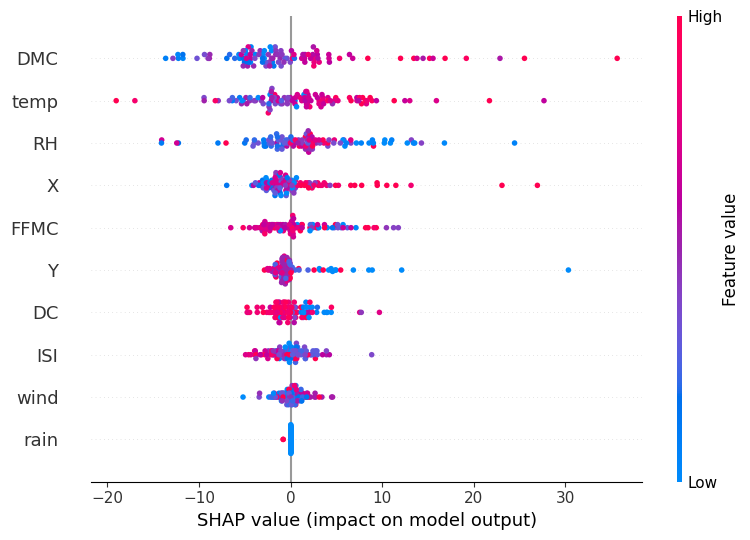

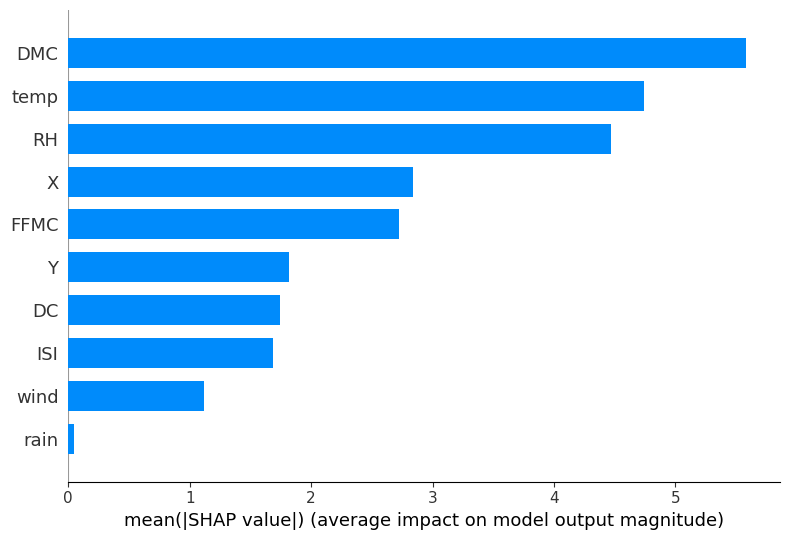

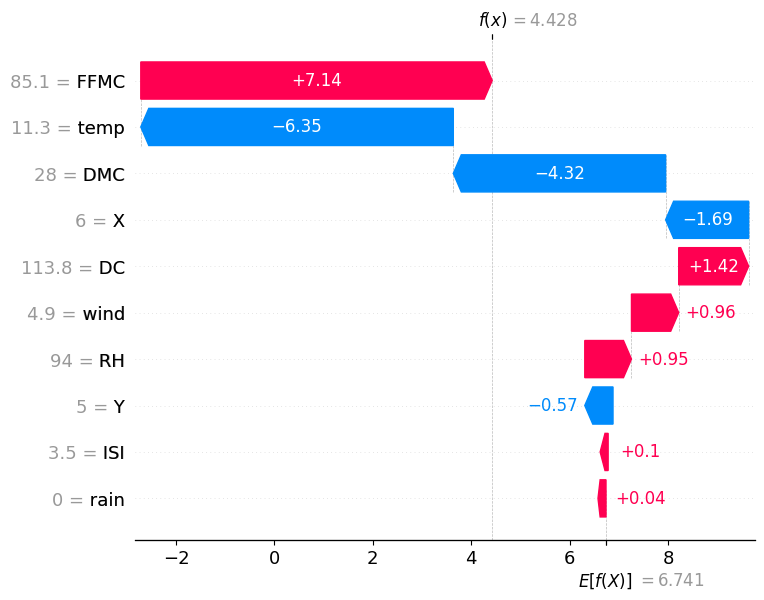

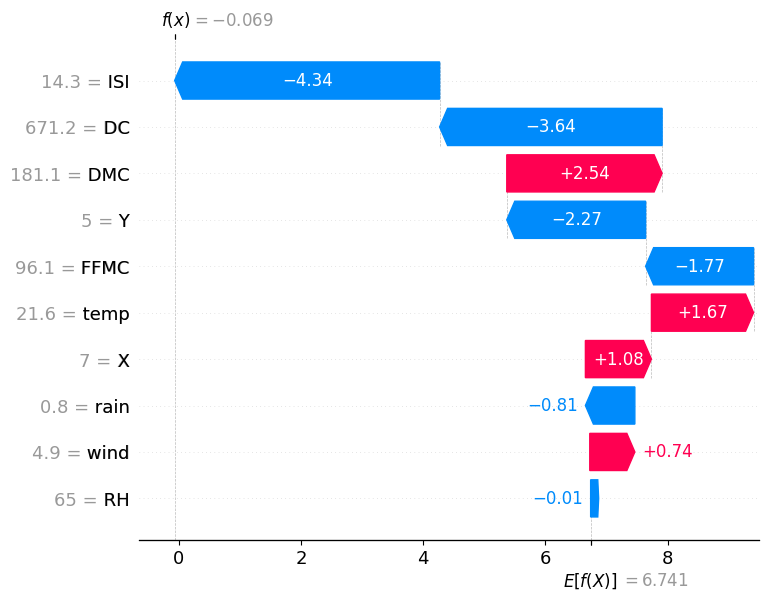

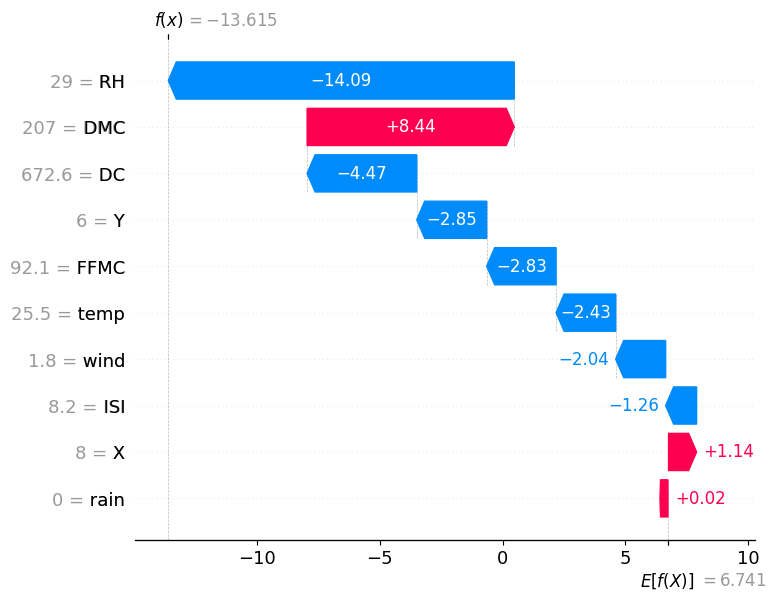

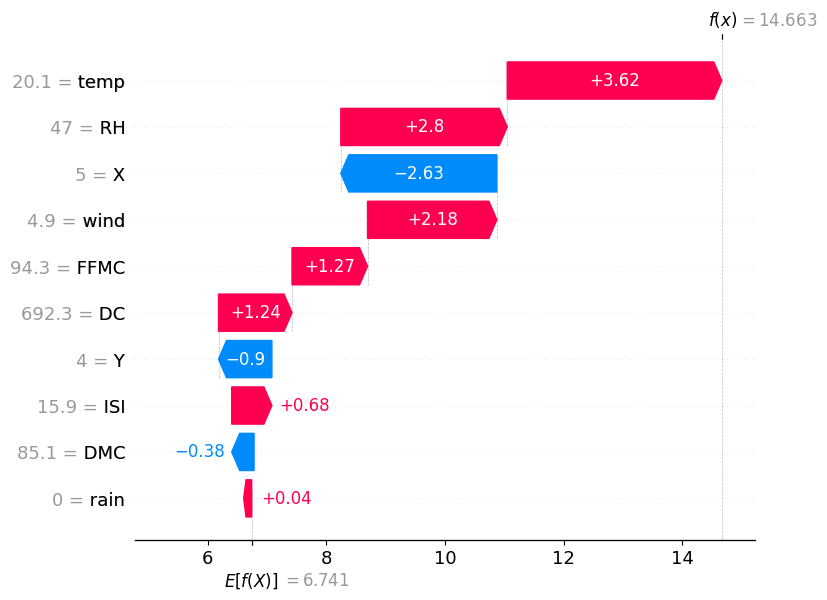

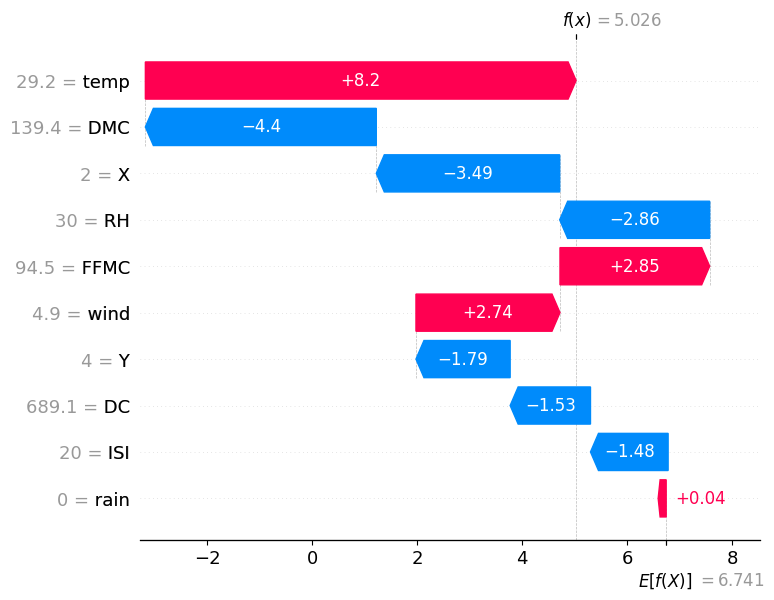

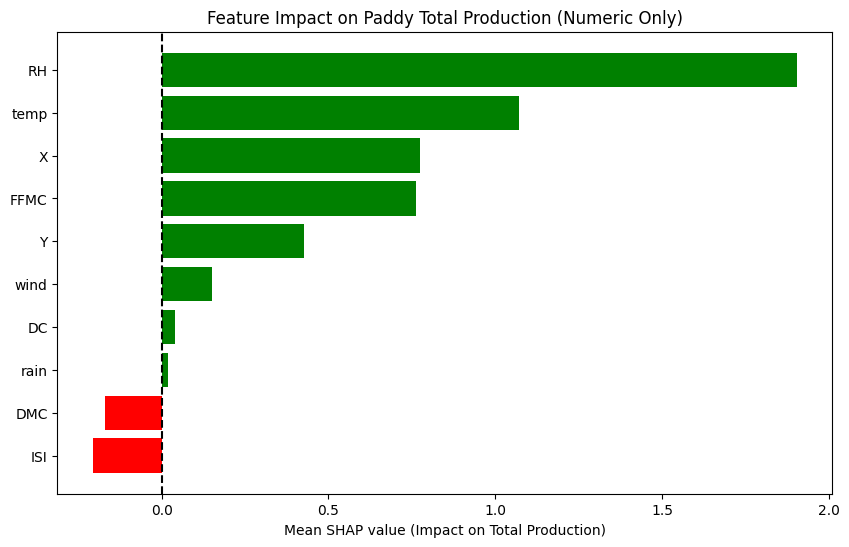

Feature contributions for sample 0
X: Feature Value = 6.0, SHAP Value = -1.6876119007030501
Y: Feature Value = 5.0, SHAP Value = -0.574087149653933
FFMC: Feature Value = 85.1, SHAP Value = 7.143208576354227
DMC: Feature Value = 28.0, SHAP Value = -4.315719477953971
DC: Feature Value = 113.8, SHAP Value = 1.4215099098021164
ISI: Feature Value = 3.5, SHAP Value = 0.0989489416393917
temp: Feature Value = 11.3, SHAP Value = -6.352453120999562
RH: Feature Value = 94.0, SHAP Value = 0.9491932866591378
wind: Feature Value = 4.9, SHAP Value = 0.9603443351021269
rain: Feature Value = 0.0, SHAP Value = 0.04357779821380973
Base value: 6.740681645510258
Model prediction: 4.42759
Actual value: 0.0


In [8]:
# 1️⃣ Install packages if needed
!pip install xgboost shap --quiet

# 2️⃣ Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import shap
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score






# Fill missing numeric values with median
df_clean = df_clean.fillna(df_clean.median())

# 4️⃣ Prepare data
target = 'area'
X = df_clean.drop(columns=[target])  # all numeric features now
y = df_clean[target]

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6️⃣ Train XGBoost Regressor
model = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# 7️⃣ Predict on test set
y_pred = model.predict(X_test)

# 8️⃣ Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Model – Test Data")
print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}\n")

# 9️⃣ Compute SHAP values
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 10️⃣ SHAP summary plot (global feature impact)
shap.summary_plot(shap_values, X_test)

# 11️⃣ SHAP bar plot (average absolute impact)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# 12️⃣ Waterfall plot for first 5 test samples
for i in range(min(5, len(X_test))):
    shap.plots.waterfall(shap_values[i])
# 13️⃣ SHAP values DataFrame for further analysis
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['base_value'] = shap_values.base_values
shap_df['predicted_value'] = y_pred
shap_df['actual_value'] = y_test.values
shap_df.to_csv("shap_values_numeric_paddy.csv", index=False)

# 14️⃣ Horizontal bar plot showing mean SHAP values
mean_shap = shap_df[X_test.columns].mean().sort_values()
plt.figure(figsize=(10,6))
colors = ['red' if val < 0 else 'green' for val in mean_shap]
plt.barh(mean_shap.index, mean_shap.values, color=colors)
plt.xlabel("Mean SHAP value (Impact on Total Production)")
plt.title("Feature Impact on Paddy Total Production (Numeric Only)")
plt.axvline(0, color='black', linestyle='--')
plt.show()

# 15️⃣ Example: Feature contributions for first test sample
sample_index = 0
sample_features = X_test.iloc[sample_index]
sample_shap_values = shap_values.values[sample_index]
print("Feature contributions for sample", sample_index)
for feature, value, shap_val in zip(X_test.columns, sample_features, sample_shap_values):
    print(f"{feature}: Feature Value = {value}, SHAP Value = {shap_val}")
print("Base value:", shap_values.base_values[sample_index])
print("Model prediction:", y_pred[sample_index])
print("Actual value:", y_test.values[sample_index])